In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report,roc_auc_score, roc_curve
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import pickle

In [2]:
instagramveri=pd.read_csv('final-v1.csv')

In [3]:
instagramveri.head()

,edge_followed_by,edge_follow,username_length,username_has_number,full_name_has_number,full_name_length,is_private,is_joined_recently,has_channel,is_business_account,has_guides,has_external_url,is_fake
0,0.001,0.257,13,1,1,13,0,0,0,0,0,0,1
1,0.000,0.958,9,1,0,0,0,1,0,0,0,0,1
2,0.000,0.253,12,0,0,0,0,0,0,0,0,0,1
3,0.000,0.977,10,1,0,0,0,0,0,0,0,0,1
4,0.000,0.321,11,0,0,11,1,0,0,0,0,0,1


In [4]:
instagramveri.tail()

,edge_followed_by,edge_follow,username_length,username_has_number,full_name_has_number,full_name_length,is_private,is_joined_recently,has_channel,is_business_account,has_guides,has_external_url,is_fake
780,0.0,0.020,9,0,0,14,1,0,0,0,0,0,0
781,0.0,0.081,18,1,0,15,1,0,0,0,0,0,0
782,0.0,0.115,9,0,0,8,1,0,0,0,0,0,0
783,0.0,0.049,12,0,0,28,1,0,0,0,0,0,0
784,0.0,0.096,11,0,0,0,1,0,0,0,0,0,0


In [5]:
instagramveri.shape

(785, 13)

In [6]:
instagramveri.columns

Index(['edge_followed_by', 'edge_follow', 'username_length',
       'username_has_number', 'full_name_has_number', 'full_name_length',
       'is_private', 'is_joined_recently', 'has_channel',
       'is_business_account', 'has_guides', 'has_external_url', 'is_fake'],
      dtype='object')

In [7]:
instagramveri.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 785 entries, 0 to 784
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   edge_followed_by      785 non-null    float64
 1   edge_follow           785 non-null    float64
 2   username_length       785 non-null    int64  
 3   username_has_number   785 non-null    int64  
 4   full_name_has_number  785 non-null    int64  
 5   full_name_length      785 non-null    int64  
 6   is_private            785 non-null    int64  
 7   is_joined_recently    785 non-null    int64  
 8   has_channel           785 non-null    int64  
 9   is_business_account   785 non-null    int64  
 10  has_guides            785 non-null    int64  
 11  has_external_url      785 non-null    int64  
 12  is_fake               785 non-null    int64  
dtypes: float64(2), int64(11)
memory usage: 79.9 KB


In [8]:
instagramveri.isnull().sum()

edge_followed_by        0
edge_follow             0
username_length         0
username_has_number     0
full_name_has_number    0
full_name_length        0
is_private              0
is_joined_recently      0
has_channel             0
is_business_account     0
has_guides              0
has_external_url        0
is_fake                 0
dtype: int64

In [9]:
instagramveri.describe()

,edge_followed_by,edge_follow,username_length,username_has_number,full_name_has_number,full_name_length,is_private,is_joined_recently,has_channel,is_business_account,has_guides,has_external_url,is_fake
count,785.000000,785.000000,785.000000,785.000000,785.000000,785.000000,785.000000,785.000000,785.0,785.000000,785.000000,785.000000,785.000000
mean,0.002223,0.401606,11.630573,0.644586,0.109554,6.129936,0.184713,0.361783,0.0,0.073885,0.001274,0.062420,0.881529
std,0.036105,0.293845,3.284329,0.478944,0.312532,6.943903,0.388312,0.480823,0.0,0.261751,0.035692,0.242072,0.323371
min,0.000000,0.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.135000,9.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,1.000000
50%,0.000000,0.336000,11.000000,1.000000,0.000000,5.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,1.000000
75%,0.000000,0.623000,13.000000,1.000000,0.000000,11.000000,0.000000,1.000000,0.0,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,26.000000,1.000000,1.000000,30.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000


In [10]:
instagramveri.describe().T

,count,mean,std,min,25%,50%,75%,max
edge_followed_by,785.0,0.002223,0.036105,0.0,0.000,0.000,0.000,1.0
edge_follow,785.0,0.401606,0.293845,0.0,0.135,0.336,0.623,1.0
username_length,785.0,11.630573,3.284329,5.0,9.000,11.000,13.000,26.0
username_has_number,785.0,0.644586,0.478944,0.0,0.000,1.000,1.000,1.0
full_name_has_number,785.0,0.109554,0.312532,0.0,0.000,0.000,0.000,1.0
full_name_length,785.0,6.129936,6.943903,0.0,0.000,5.000,11.000,30.0
is_private,785.0,0.184713,0.388312,0.0,0.000,0.000,0.000,1.0
is_joined_recently,785.0,0.361783,0.480823,0.0,0.000,0.000,1.000,1.0
has_channel,785.0,0.000000,0.000000,0.0,0.000,0.000,0.000,0.0
is_business_account,785.0,0.073885,0.261751,0.0,0.000,0.000,0.000,1.0


In [11]:
instagramveri=instagramveri.drop(['has_channel'], axis=1)
instagramveri=instagramveri.drop(['has_guides'], axis=1)

In [12]:
corr=instagramveri.corr()
corr

,edge_followed_by,edge_follow,username_length,username_has_number,full_name_has_number,full_name_length,is_private,is_joined_recently,is_business_account,has_external_url,is_fake
edge_followed_by,1.000000,-0.054259,-0.033704,-0.071313,-0.019349,0.116751,-0.024593,-0.044327,0.036585,0.180392,-0.136808
edge_follow,-0.054259,1.000000,-0.112940,0.160248,0.104735,-0.089677,-0.072626,-0.133170,-0.132422,-0.108482,0.272649
username_length,-0.033704,-0.112940,1.000000,-0.160610,-0.021410,0.277052,0.117582,-0.099414,0.132683,0.112466,-0.151752
username_has_number,-0.071313,0.160248,-0.160610,1.000000,0.217852,-0.246511,-0.154072,0.127046,-0.278637,-0.237466,0.370164
full_name_has_number,-0.019349,0.104735,-0.021410,0.217852,1.000000,0.250275,-0.072366,0.066941,-0.083482,-0.039926,0.128588
full_name_length,0.116751,-0.089677,0.277052,-0.246511,0.250275,1.000000,0.064409,-0.216572,0.323137,0.309318,-0.350433
is_private,-0.024593,-0.072626,0.117582,-0.154072,-0.072366,0.064409,1.000000,-0.071448,-0.134444,-0.041399,-0.262292
is_joined_recently,-0.044327,-0.133170,-0.099414,0.127046,0.066941,-0.216572,-0.071448,1.000000,-0.172122,-0.150433,0.276012
is_business_account,0.036585,-0.132422,0.132683,-0.278637,-0.083482,0.323137,-0.134444,-0.172122,1.000000,0.289467,-0.318395
has_external_url,0.180392,-0.108482,0.112466,-0.237466,-0.039926,0.309318,-0.041399,-0.150433,0.289467,1.000000,-0.426830


<AxesSubplot:>

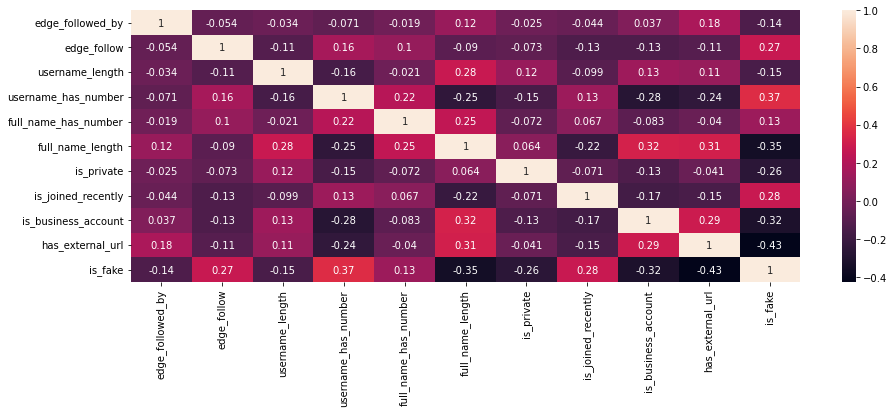

In [13]:
plt.figure(figsize=(15,5))
sns.heatmap(corr, annot=True)

In [14]:
instagramveri['is_fake'].value_counts()

1    692
0     93
Name: is_fake, dtype: int64

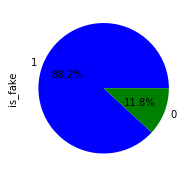

In [15]:
plt.figure(figsize=(3,3))
colors=['blue','green']
instagramveri.is_fake.value_counts().plot.pie(autopct='%1.1f%%',colors=colors)
plt.show()

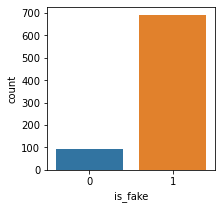

In [16]:
plt.figure(figsize=(3,3))
sns.countplot(x='is_fake', data=instagramveri)
plt.show()

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
x=instagramveri.drop(['is_fake'], axis=1)
y=instagramveri['is_fake']

In [19]:
x_train, x_test, y_train, y_test = train_test_split (x, y, test_size=0.15)

# Classification Models

In [20]:
from sklearn.tree import DecisionTreeClassifier

In [21]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report,roc_auc_score,roc_curve

In [22]:
classifier=DecisionTreeClassifier()

In [23]:
classifier.fit(x_train, y_train)

DecisionTreeClassifier()

In [24]:
y_pred=classifier.predict(x_test)

In [25]:
cm=confusion_matrix(y_pred, y_test)
print(cm)

[[  9   6]
 [  3 100]]


In [26]:
accuracy=accuracy_score(y_test, y_pred)
print(accuracy)

0.923728813559322


In [27]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.60      0.75      0.67        12
           1       0.97      0.94      0.96       106

    accuracy                           0.92       118
   macro avg       0.79      0.85      0.81       118
weighted avg       0.93      0.92      0.93       118



In [28]:
from sklearn.ensemble import RandomForestClassifier

In [29]:
model=RandomForestClassifier(random_state=0)

In [30]:
model.fit(x_train, y_train)

RandomForestClassifier(random_state=0)

In [31]:
y_pred=model.predict(x_test)

In [32]:
cm=confusion_matrix(y_pred, y_test)
print(cm)

[[ 10   1]
 [  2 105]]


In [33]:
accuracy=accuracy_score(y_test, y_pred)
print(accuracy)

0.9745762711864406


In [34]:
filename = 'rf_model.sav'
pickle.dump(model, open(filename, 'wb'))

In [35]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.83      0.87        12
           1       0.98      0.99      0.99       106

    accuracy                           0.97       118
   macro avg       0.95      0.91      0.93       118
weighted avg       0.97      0.97      0.97       118



In [36]:
from sklearn.ensemble import GradientBoostingClassifier

In [37]:
model=GradientBoostingClassifier(random_state=0)

In [38]:
model.fit(x_train, y_train)

GradientBoostingClassifier(random_state=0)

In [39]:
y_pred=model.predict(x_test)

In [40]:
cm=confusion_matrix(y_pred, y_test)
print(cm)

[[ 10   1]
 [  2 105]]


In [41]:
accuracy=accuracy_score(y_test, y_pred)
print(accuracy)

0.9745762711864406


In [42]:
filename = 'gb_model.sav'
pickle.dump(model, open(filename, 'wb'))

In [43]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.83      0.87        12
           1       0.98      0.99      0.99       106

    accuracy                           0.97       118
   macro avg       0.95      0.91      0.93       118
weighted avg       0.97      0.97      0.97       118



In [44]:
from sklearn.naive_bayes import MultinomialNB

In [45]:
model=MultinomialNB()

In [46]:
model.fit(x_train, y_train)

MultinomialNB()

In [47]:
y_pred=model.predict(x_test)

In [48]:
cm=confusion_matrix(y_pred, y_test)
print(cm)

[[ 7  7]
 [ 5 99]]


In [49]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.50      0.58      0.54        12
           1       0.95      0.93      0.94       106

    accuracy                           0.90       118
   macro avg       0.73      0.76      0.74       118
weighted avg       0.91      0.90      0.90       118



In [50]:
import pickle